In [210]:
from enum import Enum
from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

In [2]:
class Function:

    def __init__(self):

        self.left = -1.8
        self.right = 0.2

    def __call__(self, x):
        return x ** 2 - 10 * (sin(x) ** 15)
    
    def derivative(self, x):
        return 2 * x - 150 * cos(x) * (sin(x) ** 14)

In [3]:
f = Function()

In [4]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = list(map(func, func_x))

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Wykres zadanej funkcji f

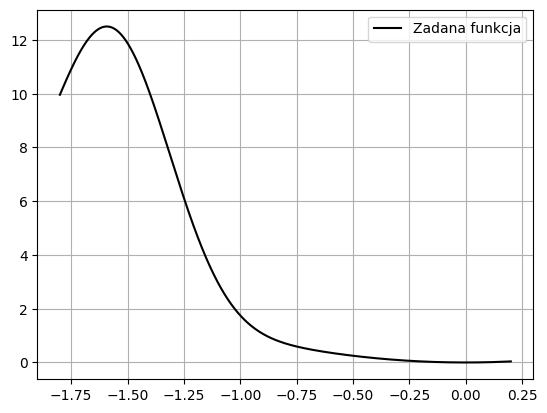

In [5]:
plot_function(f, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Wykres pochodnej zadanej funkcji f

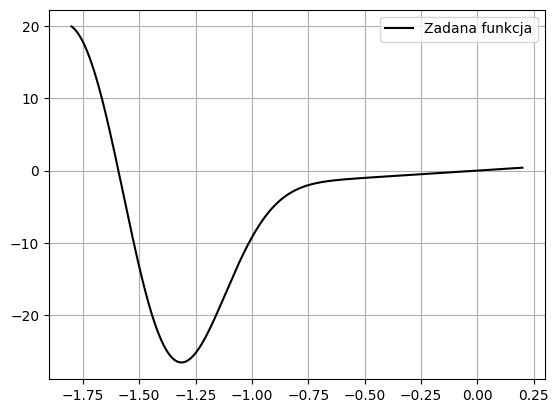

In [6]:
plot_function(f.derivative, f.left, f.right, "Zadana funkcja", "black") # Może wyprowadzić poza przedział

Znajdowanie miejsc zerowych funkcji nieliniowych metodą siecznych

![title](img_vsc/img01.png)

In [7]:
# Kryteria przyrostowe
# Stopping conditions for secant_method
class ConditionSecant(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda x_1, x_2, eps: abs(x_1 - x_2) < eps

In [8]:
def secant_method(f, x_0, x_1, condition, eps, max_iterations):
    
    x_i = x_0
    x_j = x_1 # x_j = x_(i + 1)
    
    for _ in range(max_iterations):
        
        if f(x_i) == f(x_j): # Division by zero, thus no solution
            return None
        
        x_i, x_j = x_j, x_j - ( (x_j - x_i) / (f(x_j) - f(x_i)) ) * f(x_j)
        
        if condition == ConditionSecant.ABS and ConditionSecant.ABS(f(x_j), eps):
            return x_j
        elif condition == ConditionSecant.DISTANCE and ConditionSecant.DISTANCE(x_i, x_j, eps):
            return x_j
    
    print("Exceeded max number of iterations")
    return None # Exceeded number of iterations

Przykładowe użycie

In [9]:
print(secant_method(f = f, x_0 = -0.5, x_1 = f.right, condition = ConditionSecant.ABS, eps = 1e-18, max_iterations = 1000))

9.91502889208941e-10


Znajdowanie miejsc zerowych funkcji nieliniowych metodą Newtona-Raphsona

![title](img_vsc/img02.png)

In [10]:
# Stopping conditions for newton_raphson_method
class ConditionNewton(Enum):
    ABS = lambda y_i, eps : abs(y_i) < eps
    DISTANCE = lambda y_i, yd_i, eps: abs(y_i / yd_i) < eps

In [86]:
def newton_raphson_method(f, x_0, condition, eps, max_iterations):
    
    x_i = x_0
    
    for iteration in range(max_iterations):
        
        y_i = f(x_i)
        yd_i = f.derivative(x_i)
        
        if yd_i == 0: # Derivative equal to zero
            return float("inf"), iteration
        
        if condition == ConditionNewton.ABS and ConditionNewton.ABS(f(y_i), eps):
            return x_i, iteration
        elif condition == ConditionNewton.DISTANCE and ConditionNewton.DISTANCE(y_i, yd_i, eps):
            return x_i, iteration
        
        x_i  -= y_i / yd_i        
        
    return float("inf"), iteration # Max iterations exceeded

Przykładowe użycie

In [12]:
print(newton_raphson_method(f = f, x_0 = 0.01, condition = ConditionNewton.DISTANCE, eps = 1e-18, max_iterations = 1000))

(1.1102230246251566e-18, 53)


Miejsce zerowe wyznaczone przez wolfram alpha: x_0 = 0.0

In [218]:
class TestNewtonMethod():

    def __init__(self, f, max_iterations = 1000):

        self.f = f
        self.max_iterations = max_iterations

        self.eps_values = [10 ** i for i in range(-1, -10 - 1, -1)]
        self.x_values = [round(f.left + 0.1 * i, 1) for i in range(0, int(abs(f.left - f.right) / 0.1) + 1)]
        
    def test(self):
        
        for condition in [ConditionNewton.ABS, ConditionNewton.DISTANCE]:
            
            if condition == ConditionNewton.ABS: 
                print("Condition: Abs")
            else:
                print("Condition: Distance")
                
            print("x | eps | x_0 | iterations")
            
            for x in self.x_values:
                
                for eps in self.eps_values:
                    
                    x_0, iterations = newton_raphson_method(f, x, condition, eps, self.max_iterations)
                    
                    if x_0 != float("inf"):
                        print(f"{x}, {eps:.2E}, {x_0:.2E}, {iterations}")
                    else:
                        print(f"{x}, {eps:.2E} , inf , {iterations}")
                        
    def plot_heatmap(self):
        
        data = np.zeros((len(self.eps_values), len(self.x_values)))

        for i, x in enumerate(self.x_values):
            for j, eps in enumerate(self.eps_values):
                
                x_0, iterations = newton_raphson_method(self.f, x, ConditionNewton.ABS, eps, self.max_iterations)
        
                data[j][i] = x_0

        plt.figure(figsize=(20, 8))
        
        hm = sn.heatmap(data, annot=True, xticklabels=self.x_values, yticklabels=self.eps_values, cmap='crest', fmt='.1e', annot_kws={"size": 8})

        plt.xlabel('Wartości x')
        plt.ylabel('Wartości rho')
        plt.show()

In [219]:
test_newton = TestNewtonMethod(f)

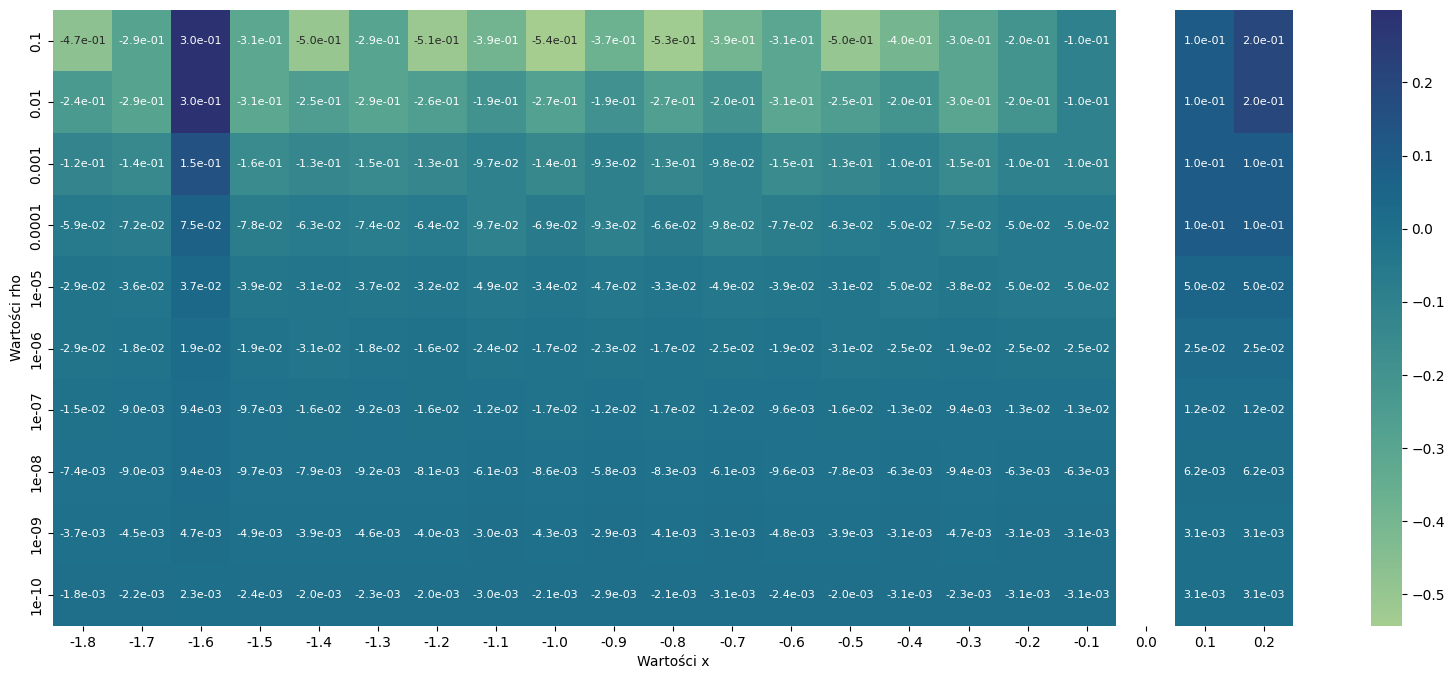

In [220]:
test_newton.plot_heatmap()

In [90]:
test_newton.test()

Condition: Abs
x | eps | x_0 | iterations
-1.8, 1.00E-01, -4.70E-01, 2
-1.8, 1.00E-02, -2.36E-01, 3
-1.8, 1.00E-03, -1.18E-01, 4
-1.8, 1.00E-04, -5.89E-02, 5
-1.8, 1.00E-05, -2.95E-02, 6
-1.8, 1.00E-06, -2.95E-02, 6
-1.8, 1.00E-07, -1.47E-02, 7
-1.8, 1.00E-08, -7.36E-03, 8
-1.8, 1.00E-09, -3.68E-03, 9
-1.8, 1.00E-10, -1.84E-03, 10
-1.8, 1.00E-11, -9.21E-04, 11
-1.8, 1.00E-12, -9.21E-04, 11
-1.8, 1.00E-13, -4.60E-04, 12
-1.8, 1.00E-14, -2.30E-04, 13
-1.8, 1.00E-15, -1.15E-04, 14
-1.8, 1.00E-16, -5.75E-05, 15
-1.8, 1.00E-17, -2.88E-05, 16
-1.8, 1.00E-18, -2.88E-05, 16
-1.8, 1.00E-19, -1.44E-05, 17
-1.8, 1.00E-20, -7.19E-06, 18
-1.7, 1.00E-01, -2.87E-01, 6
-1.7, 1.00E-02, -2.87E-01, 6
-1.7, 1.00E-03, -1.43E-01, 7
-1.7, 1.00E-04, -7.17E-02, 8
-1.7, 1.00E-05, -3.58E-02, 9
-1.7, 1.00E-06, -1.79E-02, 10
-1.7, 1.00E-07, -8.96E-03, 11
-1.7, 1.00E-08, -8.96E-03, 11
-1.7, 1.00E-09, -4.48E-03, 12
-1.7, 1.00E-10, -2.24E-03, 13
-1.7, 1.00E-11, -1.12E-03, 14
-1.7, 1.00E-12, -5.60E-04, 15
-1.7, 1.00E-